# **Data Cleaning**

## **Install packages**

In [2]:
install.packages("epiDisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(lubridate)
library(epiDisplay)
library(readxl)
library(tidyverse)

Loading required package: foreign

Loading required package: survival

Loading required package: MASS

Loading required package: nnet

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.4.4     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::alpha() masks epiDisplay::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::select()  masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## **Import data**

ไฟล์ .csv

In [20]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1cw9h8fQ_T4ohKa4wUkB4h6p865-Nw1R2&authuser=0&export=download", temp)
stemi<-read.csv(temp)

In [21]:
head(stemi)

,id,sex,age,pci,pstroke,dlp,dm,ht,d_adm,m_adm,y_adm,d_dsc,m_dsc,y_dsc,d_death,m_death,y_death
,<int>,<chr>,<int>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,14546825,Female,46,FALSE,FALSE,no,yes,no,1,1,2017,5,1,2017,NA,NA,NA
2,17116169,Male,51,TRUE,FALSE,no,no,no,1,1,2017,6,1,2017,NA,NA,NA
3,18502426,Male,55,TRUE,FALSE,yes,no,yes,1,1,2017,8,1,2017,NA,NA,NA
4,25568498,Male,53,TRUE,FALSE,yes,yes,yes,1,1,2017,2,1,2017,NA,NA,NA
5,25664763,Male,77,TRUE,FALSE,no,no,no,1,1,2017,3,1,2017,10,11,2017
6,26536597,Male,47,TRUE,FALSE,yes,no,yes,1,1,2017,6,1,2017,NA,NA,NA


ไฟล์ excel

In [16]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1tGYjCezgZZ1K76_HKxV7Tb4IBDGX-1iD&authuser=0&export=download", temp)
stemi<-as.data.frame(read_excel(temp))

In [17]:
head(stemi)

,id,sex,age,pci,pstroke,dlp,dm,ht,d_adm,m_adm,y_adm,d_dsc,m_dsc,y_dsc,d_death,m_death,y_death
,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14546825,Female,46,FALSE,FALSE,no,yes,no,1,1,2017,5,1,2017,NA,NA,NA
2,17116169,Male,51,TRUE,FALSE,no,no,no,1,1,2017,6,1,2017,NA,NA,NA
3,18502426,Male,55,TRUE,FALSE,yes,no,yes,1,1,2017,8,1,2017,NA,NA,NA
4,25568498,Male,53,TRUE,FALSE,yes,yes,yes,1,1,2017,2,1,2017,NA,NA,NA
5,25664763,Male,77,TRUE,FALSE,no,no,no,1,1,2017,3,1,2017,10,11,2017
6,26536597,Male,47,TRUE,FALSE,yes,no,yes,1,1,2017,6,1,2017,NA,NA,NA


ไฟล์จาก epidata

In [51]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1C60GbJeH3TGCCayaKfdiO6Pc8mr6yhGn&authuser=0&export=download", temp)
stemi<-read.dta(temp)

In [23]:
head(stemi)

,id,sex,age,pci,pstroke,dlp,dm,ht,d_adm,m_adm,y_adm,d_dsc,m_dsc,y_dsc,d_death,m_death,y_death
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,14546825,Female,46,0,0,no,yes,no,1,1,2017,5,1,2017,NA,NA,NA
2,17116169,Male,51,1,0,no,no,no,1,1,2017,6,1,2017,NA,NA,NA
3,18502426,Male,55,1,0,yes,no,yes,1,1,2017,8,1,2017,NA,NA,NA
4,25568498,Male,53,1,0,yes,yes,yes,1,1,2017,2,1,2017,NA,NA,NA
5,25664763,Male,77,1,0,no,no,no,1,1,2017,3,1,2017,10,11,2017
6,26536597,Male,47,1,0,yes,no,yes,1,1,2017,6,1,2017,NA,NA,NA


Population: patients with first STEMI

Exposure of interest: PCI (1) vs Medication tx only (0)

Outcome: mortality rate after discharge

Confounders:

• previous stroke: pstroke

• dyslipidemia: dlp

• DM: dm

• HT: ht

Analysis: time to event

• Start: date of discharge

• End: death date

• death status

Demographic data required:
These data stratified by pci

• age

• sex

• underlying diseases
- pstroke
- dlp
- dm
- ht

• length of hospital stay

## **Check variables**

In [52]:
glimpse(stemi)

Rows: 16,843
Columns: 17
$ id      <chr> "14546825", "17116169", "18502426", "25568498", "25664763", "2…
$ sex     <chr> "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ age     <int> 46, 51, 55, 53, 77, 47, 49, 54, 73, 63, 64, 92, 84, 83, 83, 49…
$ pci     <int> 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,…
$ pstroke <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ dlp     <chr> "no", "no", "yes", "yes", "no", "yes", "no", "no", "no", "yes"…
$ dm      <chr> "yes", "no", "no", "yes", "no", "no", "no", "no", "no", "no", …
$ ht      <chr> "no", "no", "yes", "yes", "no", "yes", "no", "no", "no", "yes"…
$ d_adm   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ m_adm   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ y_adm   <int> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 20…
$ d_dsc   <int> 5, 6, 8, 2, 3, 6, 19, 1, 19, 7, 4, 3, 7, 12, 12, 19, 1, 1, 4, …
$ m_dsc   <int>

ตรวจสอบ id ซ้ำ

In [53]:
sum(duplicated(stemi$id))

[1] 0

สร้าง date of admission

In [54]:
stemi$adm_date<-dmy(paste(stemi$d_adm,stemi$m_adm,stemi$y_adm,sep="-"))

สร้าง date of discharge

In [55]:
stemi$dsc_date<-dmy(paste(stemi$d_dsc,stemi$m_dsc,stemi$y_dsc,sep="-"))

สร้าง date of death

In [56]:
stemi$death_date<-dmy(paste(stemi$d_death,stemi$m_death,stemi$y_death,sep="-"))

Warning message:
“ 11946 failed to parse.”


ลบตัวแปรที่ไม่ใช้แล้วออกจาก dataframe

In [57]:
stemi<-stemi[,!(names(stemi) %in% c("d_adm","m_adm","y_adm","d_dsc","m_dsc","y_dsc","d_death","m_death","y_death"))]

In [58]:
head(stemi)

,id,sex,age,pci,pstroke,dlp,dm,ht,adm_date,dsc_date,death_date
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<date>,<date>,<date>
1,14546825,Female,46,0,0,no,yes,no,2017-01-01,2017-01-05,NA
2,17116169,Male,51,1,0,no,no,no,2017-01-01,2017-01-06,NA
3,18502426,Male,55,1,0,yes,no,yes,2017-01-01,2017-01-08,NA
4,25568498,Male,53,1,0,yes,yes,yes,2017-01-01,2017-01-02,NA
5,25664763,Male,77,1,0,no,no,no,2017-01-01,2017-01-03,2017-11-10
6,26536597,Male,47,1,0,yes,no,yes,2017-01-01,2017-01-06,NA


exclude inhospital death

In [59]:
nrow(stemi)

[1] 16843

In [60]:
stemi<-stemi[stemi$death_date>stemi$dsc_date | is.na(stemi$death_date),]

In [61]:
nrow(stemi)

[1] 14826

Excluded individuals =

In [62]:
16843 - 14826

[1] 2017

สร้างตัวแปร death status

In [63]:
stemi$death<-!is.na(stemi$death_date)

สร้างตัวแปร length of hospital stay

In [64]:
stemi$los<-interval(stemi$adm_date,stemi$dsc_date)/duration(1,"days")

## **Check missing data**

In [65]:
missing_values <- colSums(is.na(stemi)) #เอาชื่อ dataframe ไปแทนในวงเล็กของ is.na()
for (column in names(missing_values)) {
  cat(column, ":", missing_values[column], "\n")
}

id : 0 
sex : 0 
age : 0 
pci : 0 
pstroke : 0 
dlp : 0 
dm : 0 
ht : 0 
adm_date : 0 
dsc_date : 0 
death_date : 11946 
death : 0 
los : 0 


## **Check data format & Data manipulation**

In [24]:
glimpse(stemi)

Rows: 16,843
Columns: 17
$ id      <chr> "14546825", "17116169", "18502426", "25568498", "25664763", "2…
$ sex     <chr> "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ age     <int> 46, 51, 55, 53, 77, 47, 49, 54, 73, 63, 64, 92, 84, 83, 83, 49…
$ pci     <int> 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,…
$ pstroke <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ dlp     <chr> "no", "no", "yes", "yes", "no", "yes", "no", "no", "no", "yes"…
$ dm      <chr> "yes", "no", "no", "yes", "no", "no", "no", "no", "no", "no", …
$ ht      <chr> "no", "no", "yes", "yes", "no", "yes", "no", "no", "no", "yes"…
$ d_adm   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ m_adm   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ y_adm   <int> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 20…
$ d_dsc   <int> 5, 6, 8, 2, 3, 6, 19, 1, 19, 7, 4, 3, 7, 12, 12, 19, 1, 1, 4, …
$ m_dsc   <int>

**ตัวแปร sex**

In [25]:
stemi$sex<-factor(stemi$sex,levels = c("Female","Male"))

,Frequency,Percent,Cum. percent
Female,5028,29.9,29.9
Male,11815,70.1,100.0
Total,16843,100.0,100.0


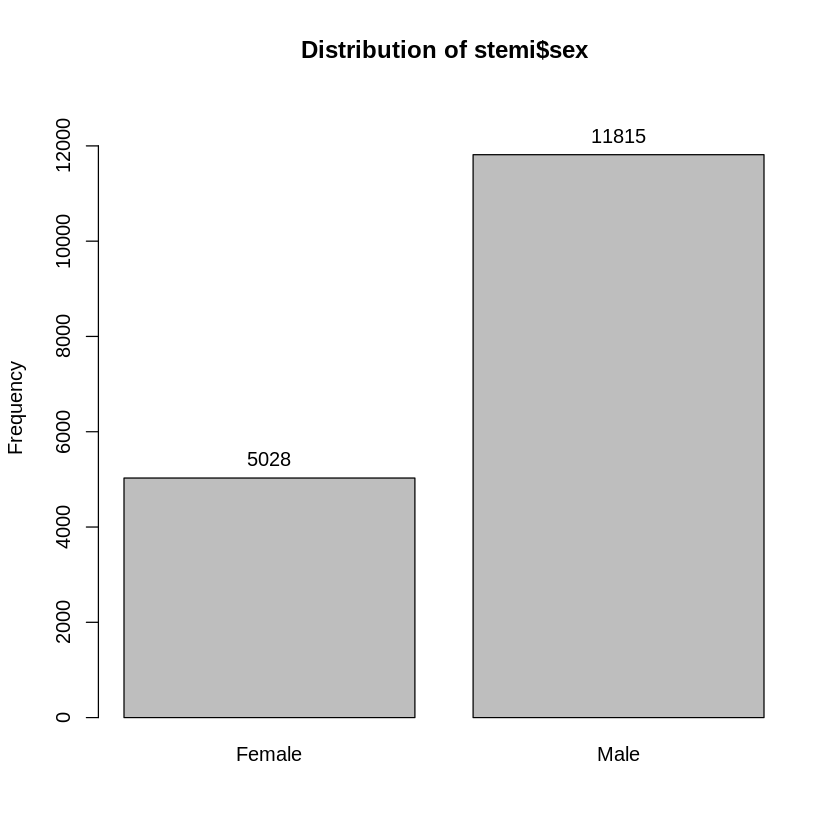

In [26]:
tab1(stemi$sex)

**ตัวแปร age**

In [29]:
summary(stemi$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   55.00   63.00   63.85   73.00  100.00 

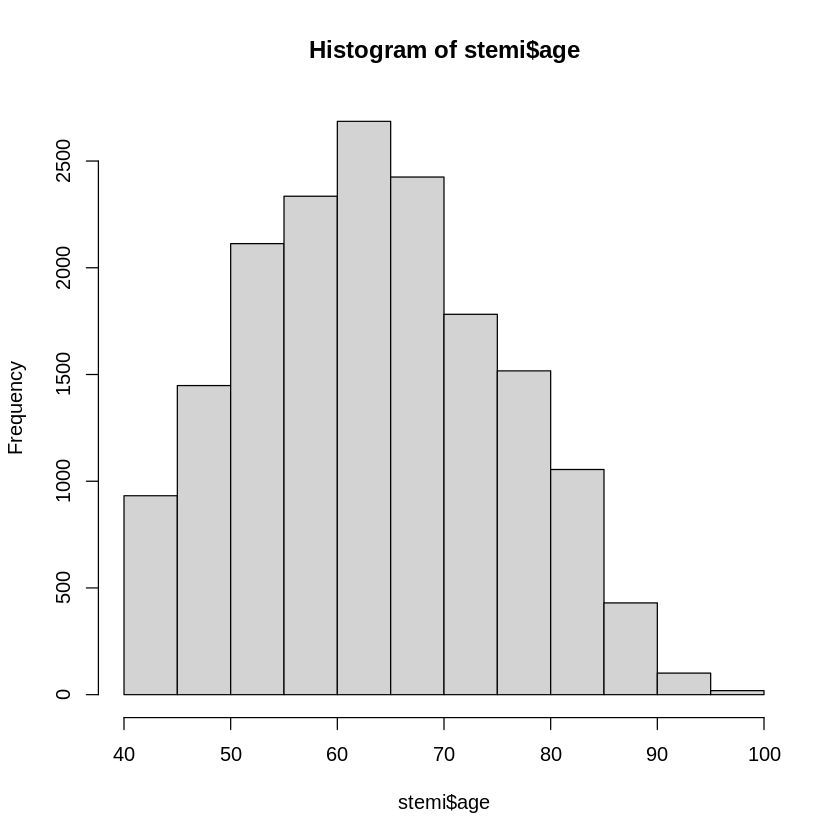

In [31]:
hist(stemi$age)

**ตัวแปร pci**

In [66]:
stemi$pci<-stemi$pci==1

,Frequency,Percent,Cum. percent
FALSE,2603,17.6,17.6
TRUE,12223,82.4,100.0
Total,14826,100.0,100.0


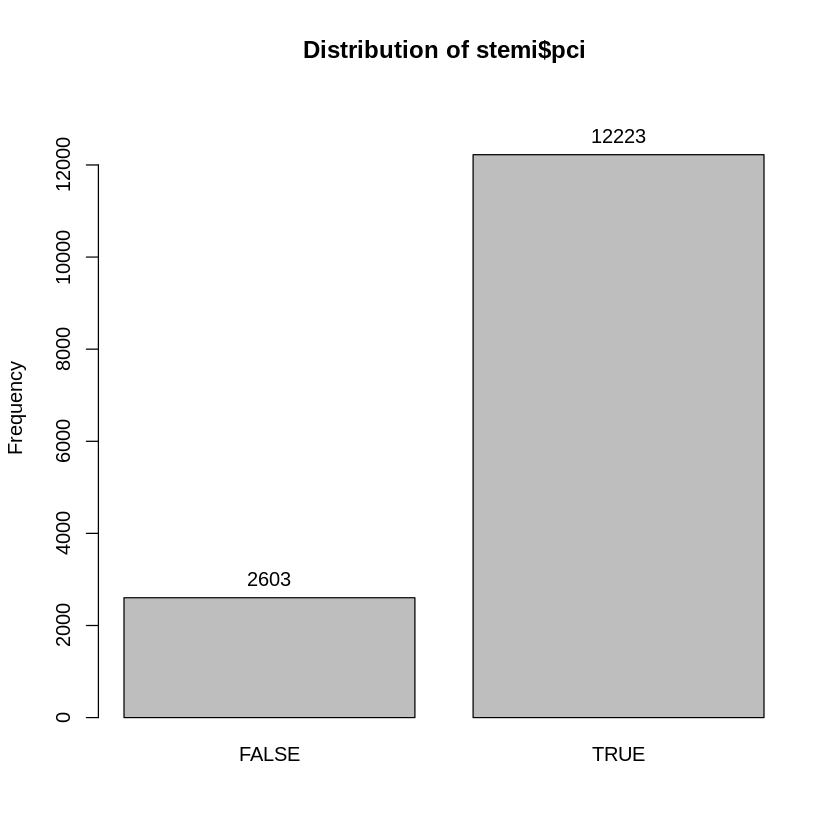

In [67]:
tab1(stemi$pci)

**ตัวแปร pstroke**

In [68]:
stemi$pstroke<-stemi$pstroke==1

,Frequency,Percent,Cum. percent
FALSE,14417,97.2,97.2
TRUE,409,2.8,100.0
Total,14826,100.0,100.0


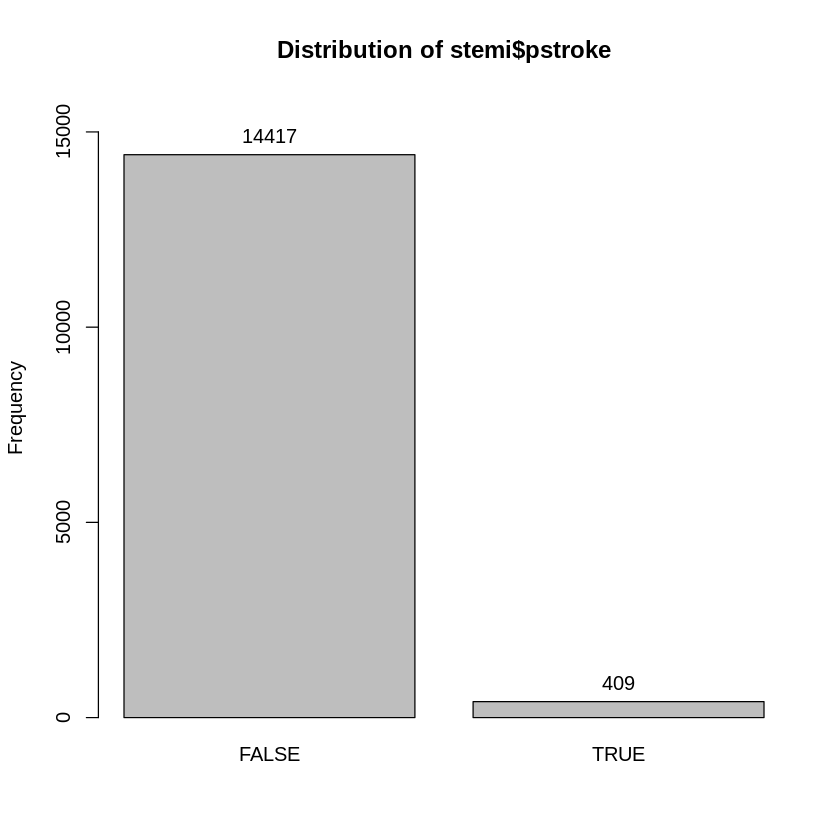

In [69]:
tab1(stemi$pstroke)

ตัวแปร dlp

In [70]:
stemi$dlp<-stemi$dlp=="yes"

,Frequency,Percent,Cum. percent
FALSE,14417,97.2,97.2
TRUE,409,2.8,100.0
Total,14826,100.0,100.0


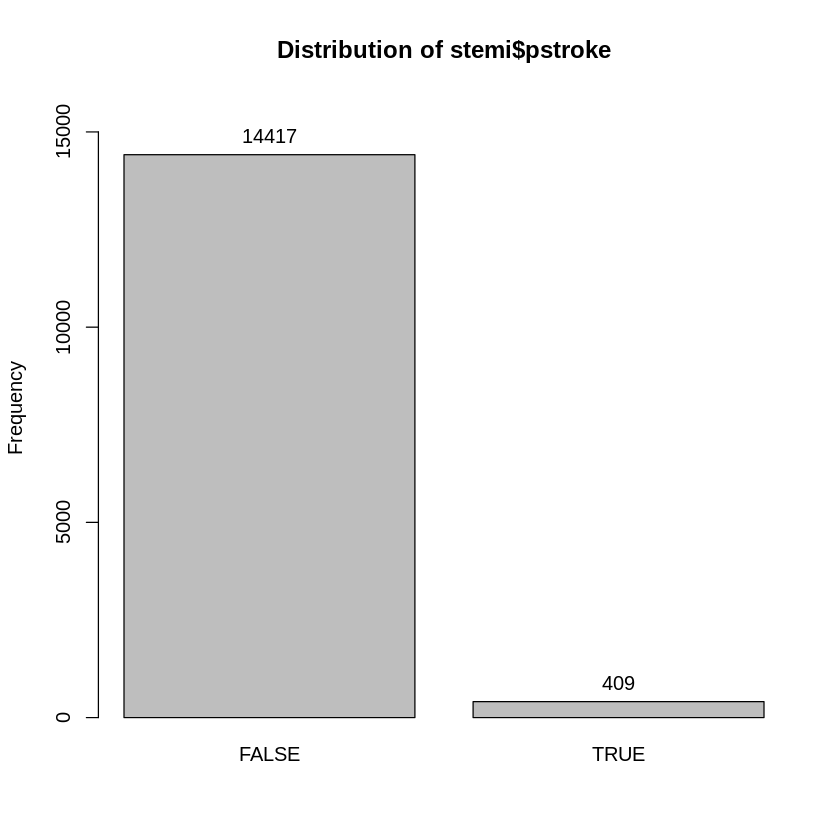

In [71]:
tab1(stemi$pstroke)

ตัวแปร dm

In [72]:
stemi$dm<-stemi$dm=="yes"

,Frequency,Percent,Cum. percent
FALSE,10552,71.2,71.2
TRUE,4274,28.8,100.0
Total,14826,100.0,100.0


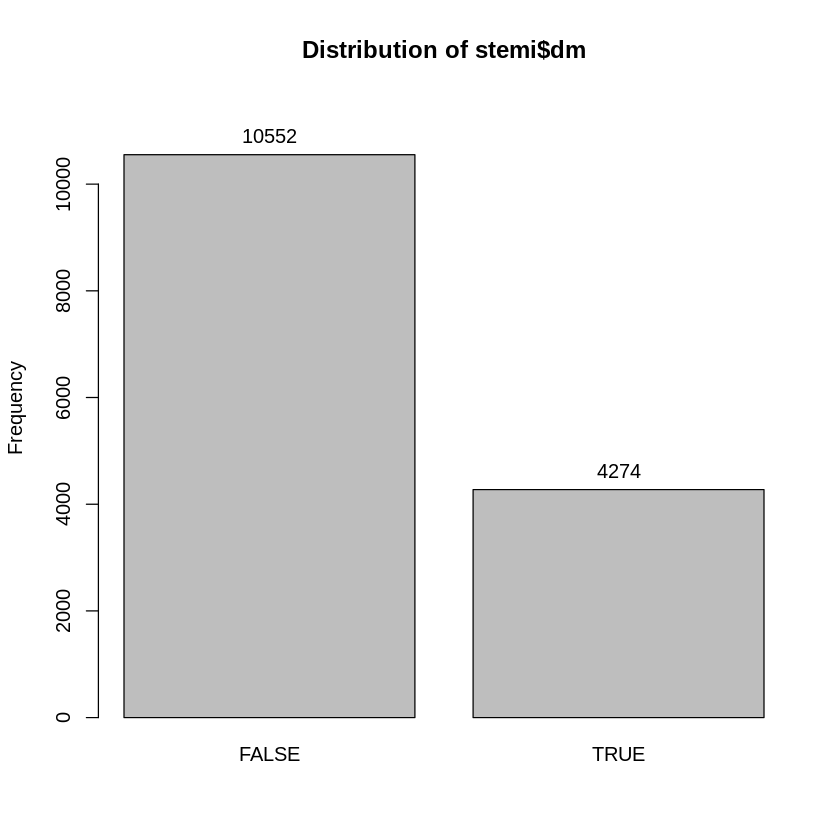

In [73]:
tab1(stemi$dm)

ตัวแปร ht

In [74]:
stemi$ht<-stemi$ht=="yes"

,Frequency,Percent,Cum. percent
FALSE,7646,51.6,51.6
TRUE,7180,48.4,100.0
Total,14826,100.0,100.0


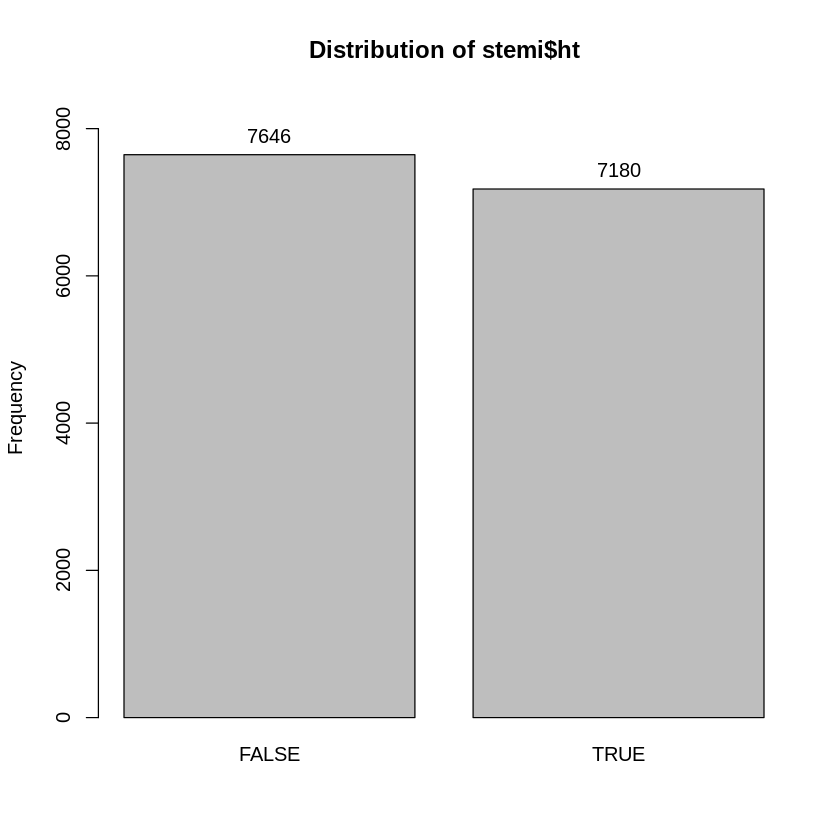

In [75]:
tab1(stemi$ht)

ตัวแปร los

In [79]:
summary(stemi$los)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   4.642   5.000 164.000 

,Frequency,Percent,Cum. percent
0,527,3.6,3.6
1,1585,10.7,14.2
2,3712,25.0,39.3
3,2385,16.1,55.4
4,1630,11.0,66.4
5,1409,9.5,75.9
6,944,6.4,82.2
7,549,3.7,85.9
8,420,2.8,88.8
9,304,2.1,90.8


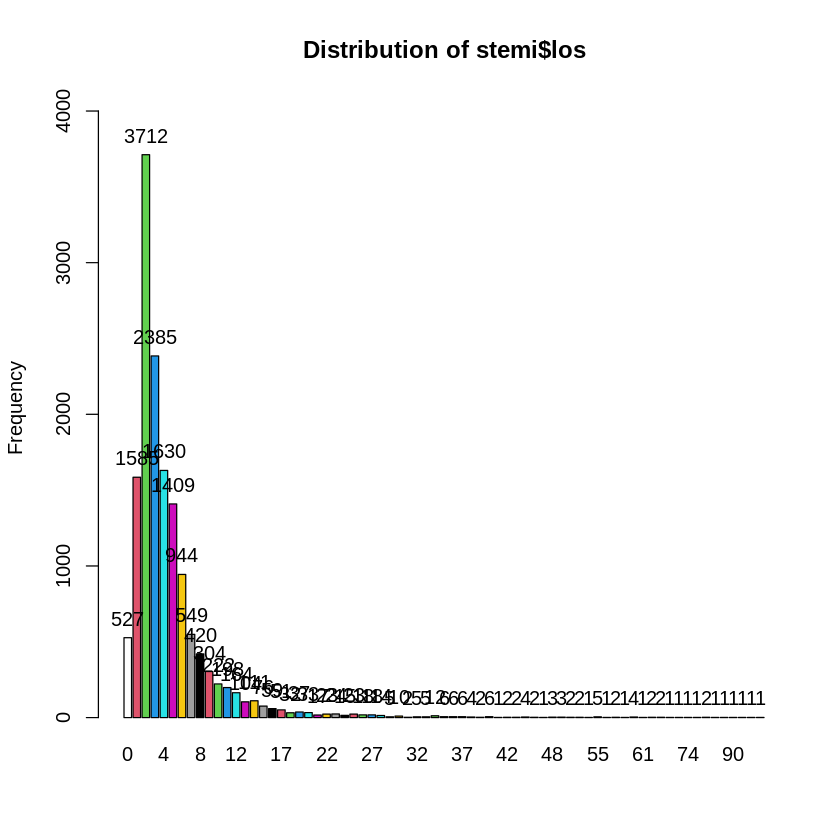

In [81]:
tab1(stemi$los)

ตัวแปร death_date

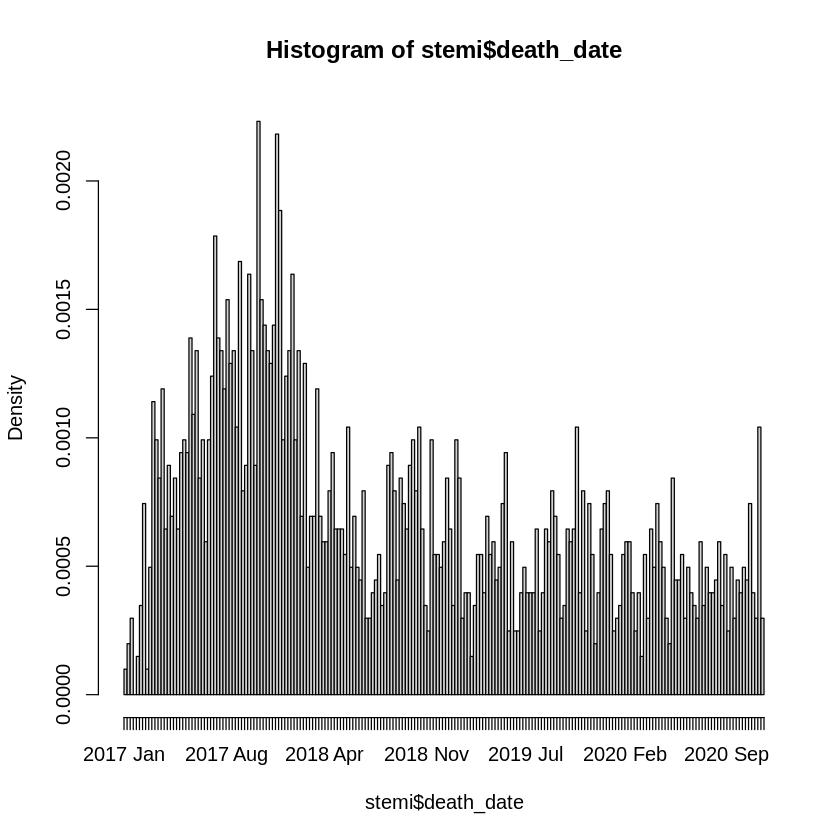

In [82]:
hist(stemi$death_date, breaks = "weeks")

ตัวแปร death

,Frequency,Percent,Cum. percent
FALSE,11946,80.6,80.6
TRUE,2880,19.4,100.0
Total,14826,100.0,100.0


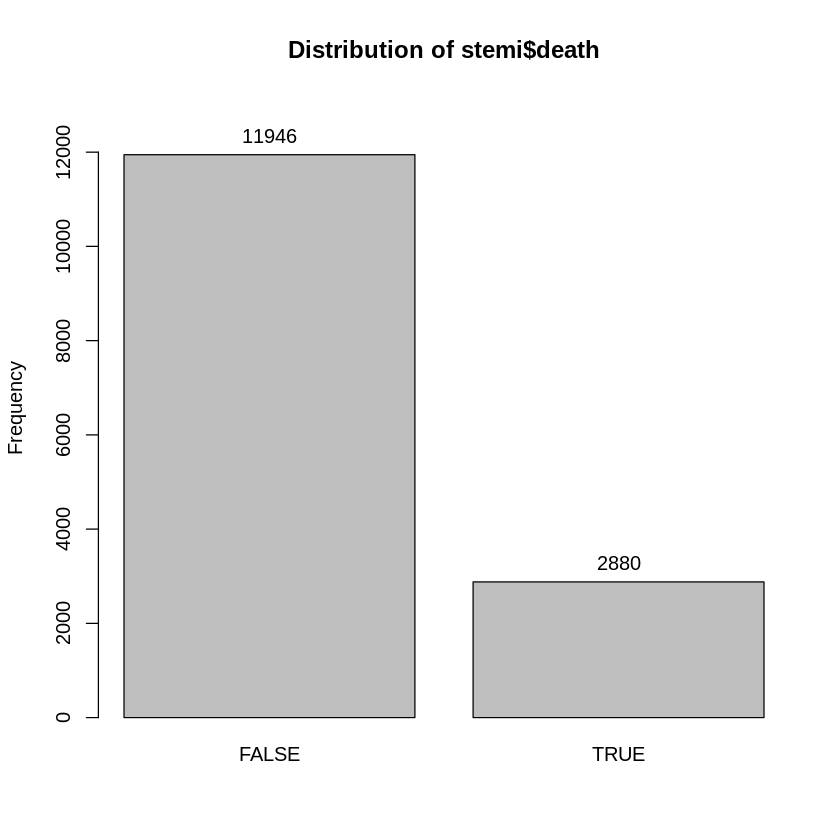

In [83]:
tab1(stemi$death)

## **สร้าง Demographic table**

In [84]:
glimpse(stemi)

Rows: 14,826
Columns: 13
$ id         <chr> "14546825", "17116169", "18502426", "25568498", "25664763",…
$ sex        <chr> "Female", "Male", "Male", "Male", "Male", "Male", "Male", "…
$ age        <int> 46, 51, 55, 53, 77, 47, 49, 63, 64, 92, 84, 83, 83, 49, 72,…
$ pci        <lgl> FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ pstroke    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ dlp        <lgl> FALSE, FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, F…
$ dm         <lgl> TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE,…
$ ht         <lgl> FALSE, FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, F…
$ adm_date   <date> 2017-01-01, 2017-01-01, 2017-01-01, 2017-01-01, 2017-01-01…
$ dsc_date   <date> 2017-01-05, 2017-01-06, 2017-01-08, 2017-01-02, 2017-01-03…
$ death_date <date> NA, NA, NA, NA, 2017-11-10, NA, NA, NA, NA, NA, NA, 2018-0…
$ death      <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALS…
$ los        <d

In [85]:
tableStack(c(sex,age,pstroke:ht,los),by=pci,data = stemi)

              FALSE       TRUE         Test stat.            P value
Total         2603        12223                                     
                                                                    
sex                                    Chisq. (1 df) = 4.49  0.034  
   Female     770 (29.6)  3365 (27.5)                               
   Male       1833 (70.4) 8858 (72.5)                               
                                                                    
age                                    Ranksum test          0.001  
  median(IQR) 64 (54,73)  62 (54,71)                                
                                                                    
pstroke                                Chisq. (1 df) = 30.92 < 0.001
   FALSE      2489 (95.6) 11928 (97.6)                              
   TRUE       114 (4.4)   295 (2.4)                                 
                                                                    
dlp                               

## **วิเคราะห์ข้อมูลอย่างง่าย**

ถ้าจะวิเคราะห์ time to event ต้องสร้าง วันที่สุดท้ายที่ f/u ที่เป็น censorship ด้วย

สมมติให้วันสุดท้ายของทุกคนในการ f/u เป็น 19 ธค 2020

In [94]:
stemi$fdate<-stemi$death_date

In [95]:
stemi$fdate[is.na(stemi$fdate)]<-dmy("19-12-2020")

In [96]:
stemi$fday<-interval(stemi$dsc_date,stemi$fdate)/duration(1,"days")

In [101]:
model_stemi<-coxph(Surv(fday,death) ~ pci + age + sex + dm, data = stemi)

In [102]:
cox.display(model_stemi)

,crude HR(95%CI),adj. HR(95%CI),P(Wald's test),P(LR-test)
pci,"0.5 (0.46,0.54)","0.53 (0.49,0.57)",< 0.001,< 0.001
,,,,
age (cont. var.),"1.06 (1.06,1.06)","1.06 (1.06,1.06)",< 0.001,< 0.001
,,,,
sex (cont. var.),"0.6759 (0.6261,0.7296)","0.9968 (0.9207,1.0792)",0.936,0.936
,,,,
dm,"1.48 (1.37,1.6)","1.61 (1.49,1.74)",< 0.001,< 0.001
,,,,
